#                     Handwritten Digit Recognition WebApp

In [1]:
import tensorflow as tf

In [2]:
#Loading The MNIST Dataset

data = tf.keras.datasets.mnist

In [43]:
#Loading the train and test dataset

(x_train, y_train),(x_test,y_test) = data.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

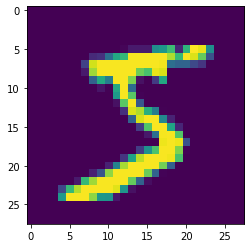

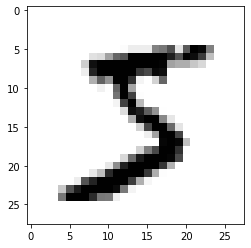

In [6]:
#Plotting a random image from the dataset

plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

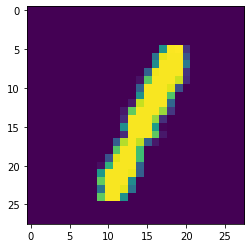

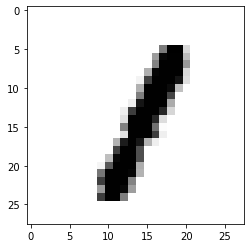

In [7]:
#Plotting a random image from the dataset

plt.imshow(x_train[45001])
plt.show()
plt.imshow(x_train[45001],cmap=plt.cm.binary)

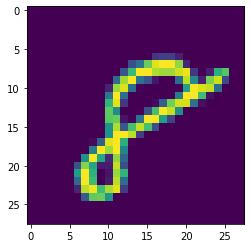

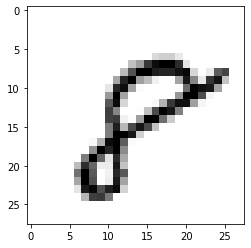

In [8]:
#Plotting a random image from the dataset

plt.imshow(x_train[59999])
plt.show()
plt.imshow(x_train[59999],cmap=plt.cm.binary)

In [9]:
#Checking the values of each pixel
#Before Normalization

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

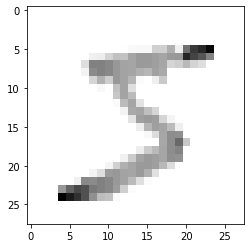

In [44]:
#Normalize the data

x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [45]:
#Now all values are from 0 to 1

x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [46]:
y_train[0]

5

In [47]:
#Reshaping the train and test data

import numpy as np
final_x_train=np.array(x_train).reshape(-1,28,28,1)
final_x_test=np.array(x_test).reshape(-1,28,28,1)

In [48]:
final_x_train.shape

(60000, 28, 28, 1)

In [49]:
final_x_test.shape

(10000, 28, 28, 1)

In [33]:
import pandas as pd

train_d_svm_l=pd.read_csv('train.csv')
test_d_svm_l=pd.read_csv('test.csv')

In [34]:
y = train_d_svm_l['label']
X = train_d_svm_l.drop(columns = 'label')
X = X/255.0
test_d_svm_l = test_d_svm_l/255.0
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
scaled_data = scale(train_d_svm_l)

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(scaled_data, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [35]:
from sklearn.svm import SVC

model_linear = SVC(kernel='linear')
model_linear.fit(X_train_svm, y_train_svm)

SVC(kernel='linear')

In [36]:
y_pred = model_linear.predict(X_test_svm)
y_pred

array([7, 3, 9, ..., 1, 0, 1], dtype=int64)

In [38]:
from sklearn import metrics 
from sklearn.metrics import f1_score,precision_score

print("accuracy:", metrics.accuracy_score(y_true=y_test_svm, y_pred=y_pred))
f1score=f1_score(y_test, y_pred,average='weighted')
print(f'f1score: {round(f1score,5)}')

precision_score=precision_score(y_test_svm, y_pred,average='weighted')
print(f'precision_score: {round(precision_score,5)}')

accuracy: 0.9532539682539682
f1score: 0.95322
precision_score: 0.95335


In [39]:
model_non_linear=SVC(kernel="rbf")

In [40]:
model_non_linear.fit(X_train_svm,y_train_svm)

SVC()

In [41]:
y_pred1=model_non_linear.predict(X_test_svm)
y_pred1

array([7, 3, 9, ..., 1, 0, 1], dtype=int64)

In [42]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred1))

f1score1=f1_score(y_test, y_pred1,average='weighted')
print(f'f1score: {round(f1score,5)}')


accuracy: 0.9452380952380952
f1score: 0.95322


# Describing The Model

In [25]:
#Importing required module for prediction
#Importing different layers of the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [26]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=final_x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [27]:
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [28]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [50]:
len(final_x_train)

60000

In [51]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
#Fitting the model

model.fit(final_x_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 35s 21ms/step - loss: 0.6434 - accuracy: 0.7967 - val_loss: 0.1338 - val_accuracy: 0.9608
Epoch 2/5
1500/1500 [==============================] - 30s 20ms/step - loss: 0.1072 - accuracy: 0.9672 - val_loss: 0.0779 - val_accuracy: 0.9756
Epoch 3/5
1500/1500 [==============================] - 31s 20ms/step - loss: 0.0699 - accuracy: 0.9785 - val_loss: 0.0553 - val_accuracy: 0.9837
Epoch 4/5
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0564 - accuracy: 0.9825 - val_loss: 0.0845 - val_accuracy: 0.9749
Epoch 5/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0416 - accuracy: 0.9869 - val_loss: 0.0557 - val_accuracy: 0.9847


In [53]:
#Printing the test accuracy along with test loss

test_loss, test_acc = model.evaluate(final_x_test, y_test)
print("Test loss from our Sequential model is: ",round(test_loss,2)*100,"%")
print("Accuracy of our model's prediction is: ",round(test_acc,2)*100,"%")

313/313 [==============================] - 3s 6ms/step - loss: 0.0604 - accuracy: 0.9835
Test loss from our Sequential model is:  6.0 %
Accuracy of our model's prediction is:  98.0 %


In [54]:
test_acc

0.9835000038146973

In [55]:
#Testing the model with test data

predictions = model.predict([final_x_test])

In [56]:
predictions

array([[4.9841998e-07, 3.4135680e-06, 6.2349368e-06, ..., 9.9997795e-01,
        1.6432956e-06, 4.2616894e-06],
       [1.8194600e-05, 1.7466556e-06, 9.9997616e-01, ..., 6.4662657e-08,
        5.7757444e-07, 9.2412034e-07],
       [8.5580768e-07, 9.9998176e-01, 6.5885529e-06, ..., 4.2152183e-06,
        3.7834602e-07, 1.8724647e-07],
       ...,
       [1.2376927e-09, 2.8219395e-06, 1.9231367e-08, ..., 2.8028495e-07,
        7.8261451e-07, 1.3650316e-06],
       [3.5091791e-06, 1.8732734e-11, 1.1124900e-09, ..., 2.5126514e-08,
        6.2926614e-05, 3.9103615e-08],
       [7.9698591e-05, 3.9583099e-08, 2.9710963e-04, ..., 1.9357238e-08,
        1.7552362e-05, 1.6832157e-06]], dtype=float32)

In [57]:
#Testing the model with a random value from dataset

print(np.argmax([predictions[0]]))

7


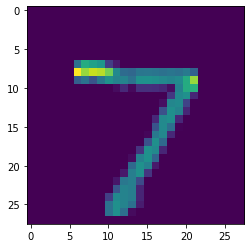

In [58]:
#Checking whether the prediction is correct or not

plt.imshow(x_test[0])

In [59]:
#Testing the model with another random value from dataset

print(np.argmax(predictions[2987]))

5


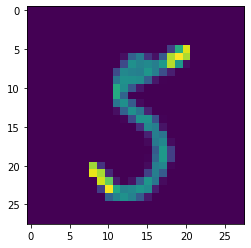

In [60]:
#Checking whether the prediction is correct or not

plt.imshow(x_test[2987])

## Model Evaluation

In [61]:
predictions

array([[4.9841998e-07, 3.4135680e-06, 6.2349368e-06, ..., 9.9997795e-01,
        1.6432956e-06, 4.2616894e-06],
       [1.8194600e-05, 1.7466556e-06, 9.9997616e-01, ..., 6.4662657e-08,
        5.7757444e-07, 9.2412034e-07],
       [8.5580768e-07, 9.9998176e-01, 6.5885529e-06, ..., 4.2152183e-06,
        3.7834602e-07, 1.8724647e-07],
       ...,
       [1.2376927e-09, 2.8219395e-06, 1.9231367e-08, ..., 2.8028495e-07,
        7.8261451e-07, 1.3650316e-06],
       [3.5091791e-06, 1.8732734e-11, 1.1124900e-09, ..., 2.5126514e-08,
        6.2926614e-05, 3.9103615e-08],
       [7.9698591e-05, 3.9583099e-08, 2.9710963e-04, ..., 1.9357238e-08,
        1.7552362e-05, 1.6832157e-06]], dtype=float32)

In [62]:
#Converting back to integer from one hot encoding

a = np.argmax(predictions,axis=1)

In [63]:
a

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [64]:
#F1 Score

f1score=f1_score(y_test, a,average='weighted')
print(f'f1score: {round(f1score,5)}')

f1score: 0.98348


# Creating a web interface using Gradio

In [66]:
import gradio as gd

In [67]:
def predict_image(img):
  img_3d=img.reshape(-1,28,28,1)
  im_resize=img_3d/255.0
  prediction=model.predict(im_resize)
  pred=np.argmax(prediction)
  return pred

In [68]:
'''output_comp=gd.outputs.Label(num_top_classes=3)'''
iface = gd.Interface(
    predict_image, 
    inputs="sketchpad", 
    outputs="label",live=True,
    title="Digit Recognition WebApp",
    description='It is a webapp which is capable of predicting handwritten digits from 0-9.',
    css="""body{
            background-image: linear-gradient(to bottom right, lightskyblue, yellow);

        
}
            """,
    allow_screenshot=False,
    allow_flagging=False)

In [ ]:
iface.launch(debug='True',share=True)

Running locally at: http://127.0.0.1:7861/
This share link will expire in 72 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted
Running on External URL: https://46545.gradio.app
Interface loading below...


# Testing our model with a digit drawn in Paint

In [70]:
import cv2

In [74]:
img = cv2.imread('three.png')

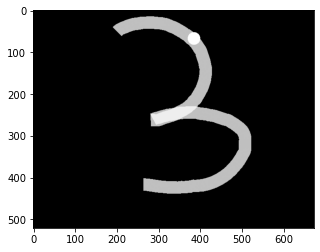

In [75]:
plt.imshow(img)

In [76]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [77]:
gray.shape

(521, 672)

In [78]:
resized = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [79]:
resized.shape

(28, 28)

In [80]:
newimg = tf.keras.utils.normalize(resized,axis=1)

In [81]:
newimg = np.array(newimg).reshape(-1,28,28,1)

In [82]:
newimg.shape

(1, 28, 28, 1)

In [83]:
prediction_1=model.predict(newimg)

In [84]:
np.argmax(prediction_1)

3

### This is a group project about digit recognition webapp made using the Sequential model with 3 Convolution Neural Networks. The webapp is created using Gradio, which is an open source python library.
### Members:
### 1. Debanjan Rudra (13000219065)
### 2. Shourjo Banerjee (13000219092)
### 3. Vishal Kumar (13000219113)
### 4. Vivek Gupta (13000219091)